# THEME BASED PROJECT - Stock Market Analysis

#### Apoorva 1602-17-737-008
#### Junaid 1602-17-737-020
#### Smaran 1602-17-737-035

Data Visualization code

Here we are importing the libraries. 


In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from IPython.display import clear_output


# Data Visualization
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Here we are reading the output file(daily frequency) of Mapreduce into dataframe df

In [3]:
df = pd.read_csv('.\\MapReduce\\Test1\\daily\\output2\\Daily\\part-r-00000', sep='\t')
df.head()

,stock_name,date,adj_close
0,AAPL,2015-05-04,118.437393
1,AAPL,2015-05-05,115.768646
2,AAPL,2015-05-06,115.041649
3,AAPL,2015-05-07,115.753204
4,AAPL,2015-05-08,117.934090


Here we are grouping the data that belongs to a perticular company and printing the names and count of all the stocks

In [4]:
grouped = df.groupby(df.stock_name)
names = df['stock_name'].unique().tolist()
for item in names:
    print(item)


AAPL
ACN
ADDYY
AMZN
BABA
BBY
DELL
DTCCX
F
FB
G
GOOGL
HOG
HPQ
IBM
INFY.NS
KO
MSFT
NKE
NTDOF
ORCL
PEGA
RELIANCE.NS
RZZRY
SNE
TATAMOTORS.NS
TWTR
UA
VRSK
WMT


In [5]:
len(names)

30

In [6]:
#for exploring different stocks(give 1st letter and we'll show you list of stocks starting with that letter)
check=input("Enter the letter: ") 
res = [idx for idx in names if idx[0] == check.upper()]
print(res)

Enter the letter: f
['F', 'FB']


In [7]:
#Enter the Stock symbol and we will do furthur analysis
flag = 0

while flag == 0:
    stock_code = input("Enter stock code: ").upper().strip()
    #print(stock_code)
    #print(type(stock_code))
    if stock_code not in names:
        clear_output(wait=True)
        print('invalid code\n See and Re-enter!!')
    if stock_code in names:
        flag = 1
print(stock_code)

Enter stock code: fb
FB


In [8]:
globals()['stck'] = grouped.get_group(stock_code)
    
globals()['stck'] = globals()['stck'].set_index(globals()['stck']['date'], drop=False)

globals()['stck'] = globals()['stck'].drop(['stock_name','date'], axis=1)

Here we will split the big data set into multiple datasets with company's name as dataset's name

In [9]:
for item in names:
    globals()[item] = grouped.get_group(item)
    
for item in names:
    globals()[item] = globals()[item].set_index(globals()[item]['date'], drop=False)
    
for item in names:
    globals()[item] = globals()[item].drop(['stock_name','date'], axis=1)

In [10]:

stck.head()

,adj_close
date,
2015-05-04,78.809998
2015-05-05,77.559998
2015-05-06,78.099998
2015-05-07,78.430000
2015-05-08,78.510002


1)Here we'll plot graph to observe the fluctuations of Entered stock 

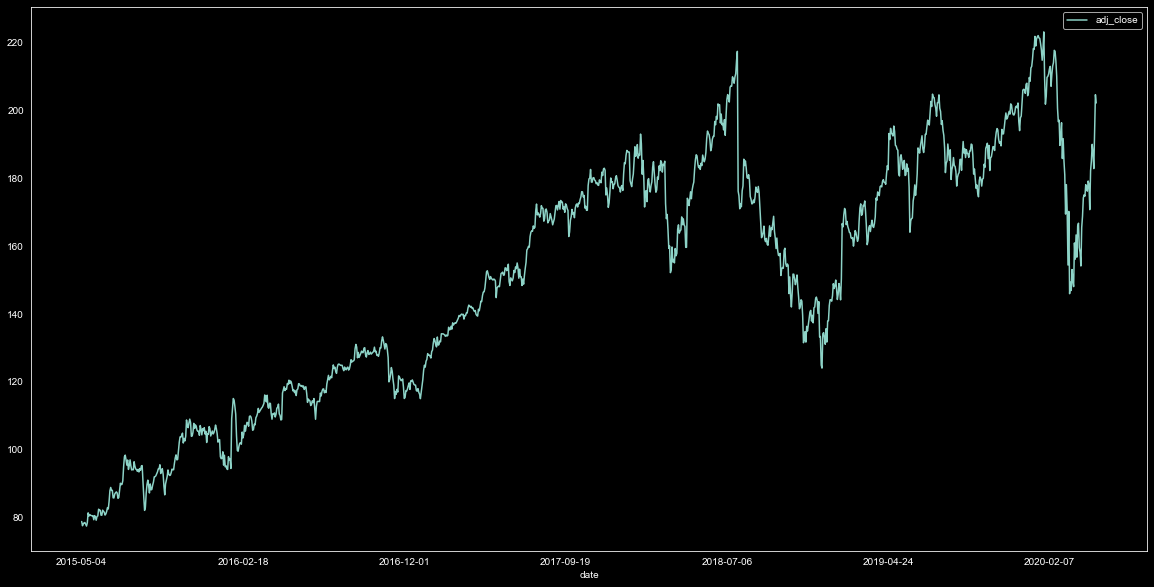

In [11]:
mpl.rc('figure', figsize=(20, 10))
mpl.__version__

# Adjusting the style of matplotlib
plt.style.use('dark_background')


stck.plot(grid = False)

2)Calculating Moving average with a window of 100 days and plotting graph to measure given stock's support and resistance

In [12]:
stck['movin_avg'] = stck.rolling(window=100).mean()
stck.tail()

,adj_close,movin_avg
date,,
2020-04-27,187.500000,193.1511
2020-04-28,182.910004,192.9920
2020-04-29,194.190002,192.9468
2020-04-30,204.710007,193.0003
2020-05-01,202.270004,193.0125


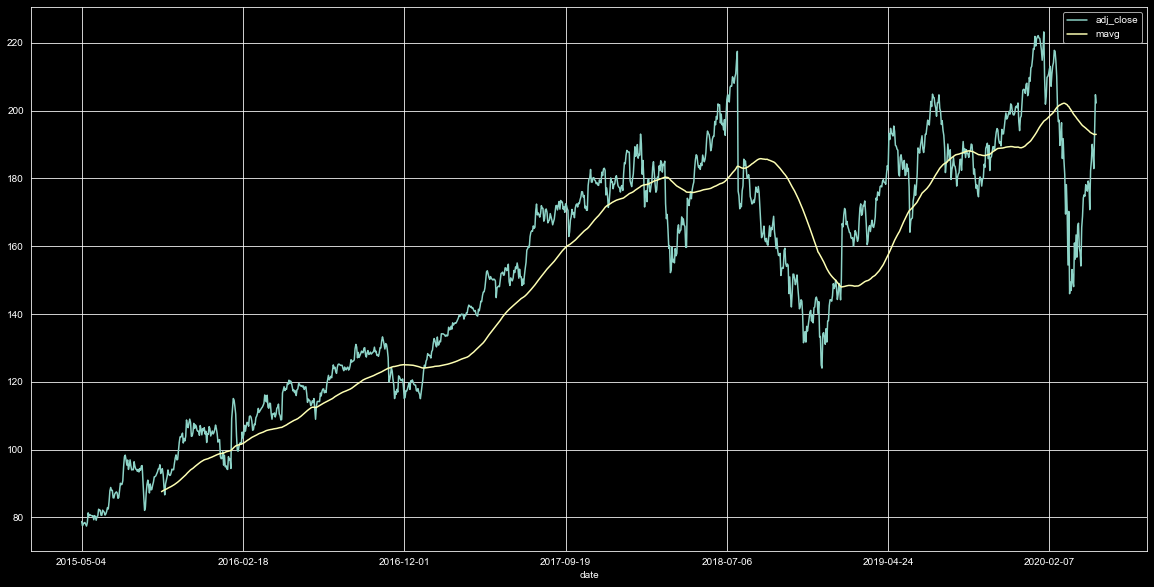

In [14]:
stck['adj_close'].plot()
stck['movin_avg'].plot(label='mavg')
plt.legend()

3)Here we will try to check the stability of company by viewing returns, which can be calculated using 'percentage change' on adjusted close price

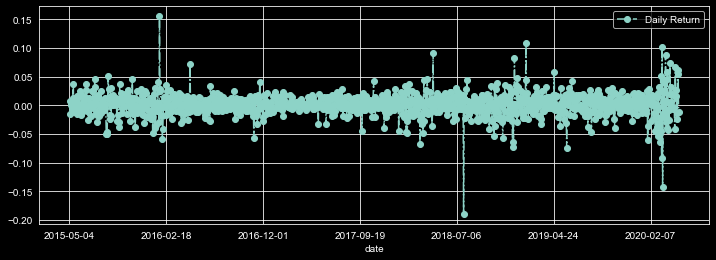

In [15]:
stck['Daily Return'] = stck['adj_close'].pct_change()

stck['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='-.', marker='o')

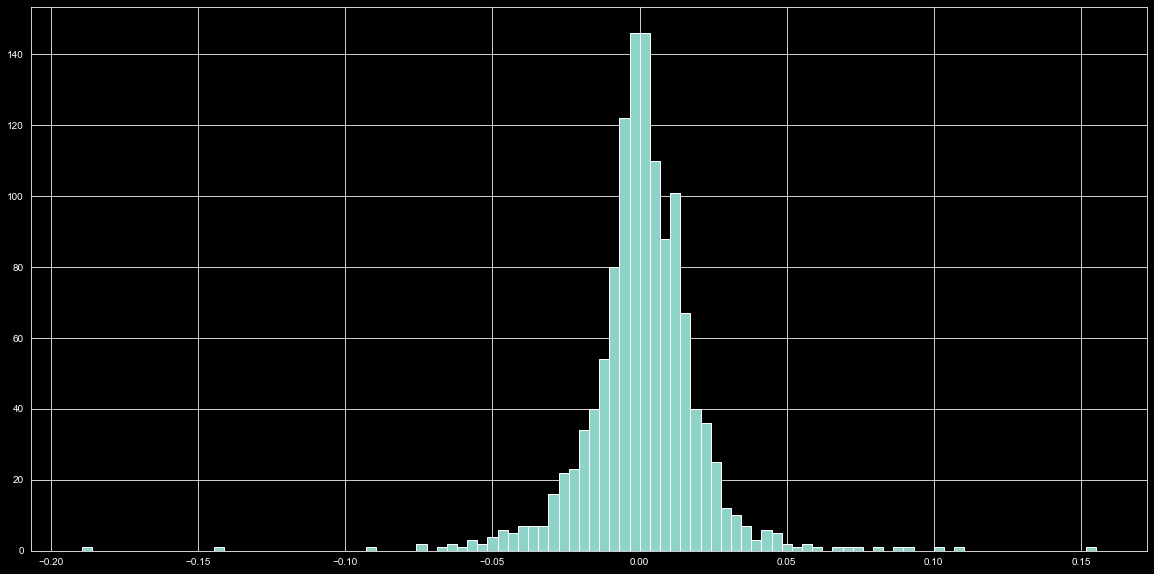

In [16]:
stck['Daily Return'].hist(bins=100)

4) we will try to compare stocks of notable tech gaints and analyse there relative changes using secondary_y option in plots 

In [18]:
#You can do this analysis taking any no.of companies you want
stocks = pd.DataFrame({"AAPL": AAPL["adj_close"],
                     "MSFT": MSFT["adj_close"],
                      "ORCL": ORCL["adj_close"],
                      "AMZN": AMZN["adj_close"],
                      "GOOGL": GOOGL["adj_close"],
                      "IBM": IBM["adj_close"],})
 
stocks.head()

,AAPL,MSFT,ORCL,AMZN,GOOGL,IBM
2015-05-04,118.437393,43.497272,41.120018,423.040009,NaN,139.712860
2015-05-05,115.768646,42.920189,40.502148,421.190002,NaN,138.998123
2015-05-06,115.041649,41.729969,39.893524,419.100006,NaN,137.598297
2015-05-07,115.753204,42.108677,40.096390,426.880005,NaN,139.424789
2015-05-08,117.934090,43.055447,40.585144,433.690002,NaN,140.802795


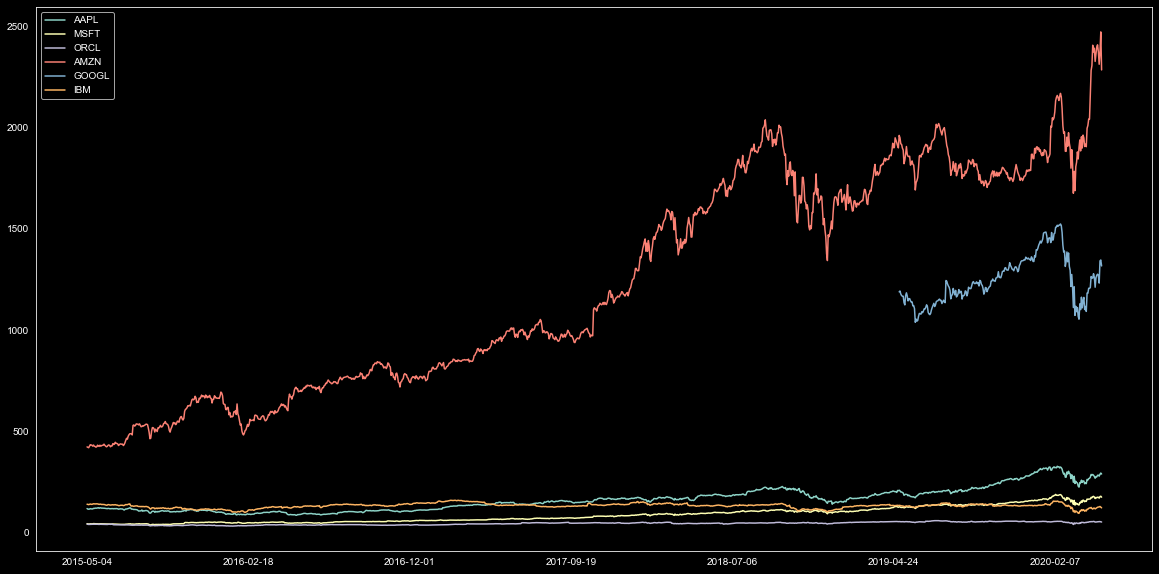

In [19]:
stocks.plot(legend=True, grid=False)

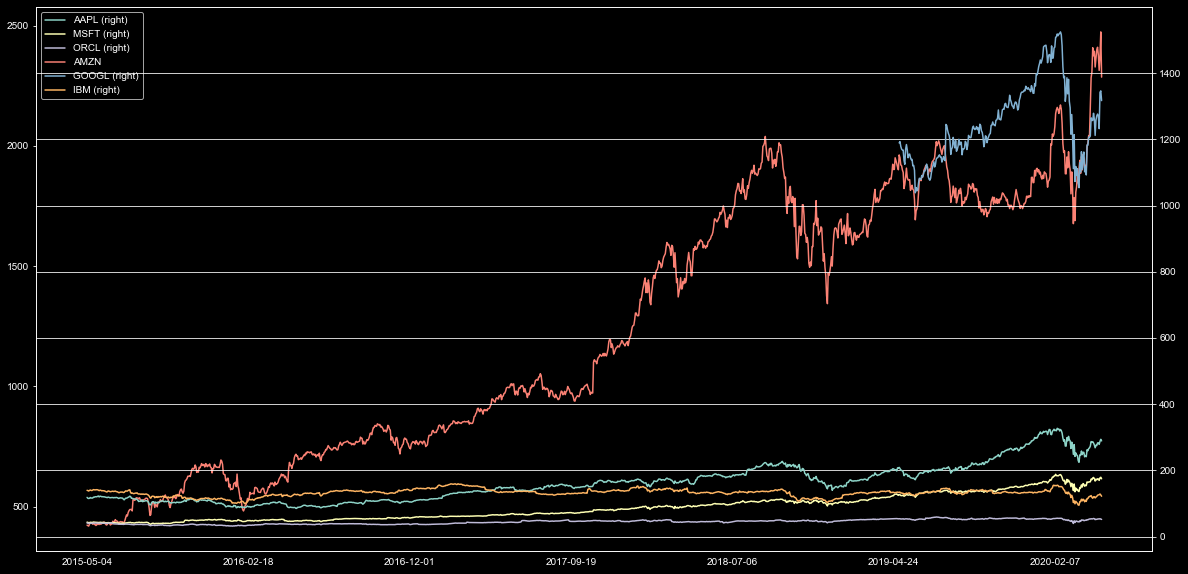

In [20]:
stocks.plot(secondary_y = ["AAPL", "MSFT","ORCL","GOOGL","IBM"], grid = False,figsize=(20,10))

comparing the daily returns of these companies using jointplot of seaborn

In [21]:
tech_returns = stocks.pct_change()
tech_returns.head()

,AAPL,MSFT,ORCL,AMZN,GOOGL,IBM
2015-05-04,NaN,NaN,NaN,NaN,NaN,NaN
2015-05-05,-0.022533,-0.013267,-0.015026,-0.004373,NaN,-0.005116
2015-05-06,-0.006280,-0.027731,-0.015027,-0.004962,NaN,-0.010071
2015-05-07,0.006185,0.009075,0.005085,0.018564,NaN,0.013274
2015-05-08,0.018841,0.022484,0.012189,0.015953,NaN,0.009884


C:\Users\Innu\anaconda3\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


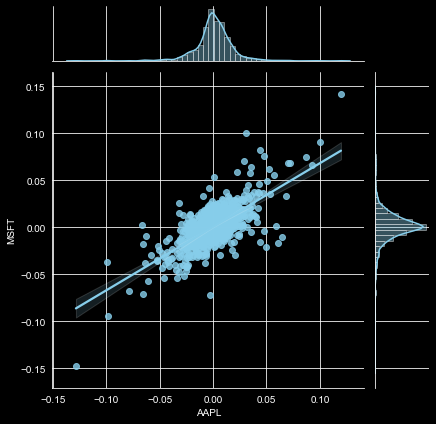

In [22]:
sns.jointplot('AAPL','MSFT',tech_returns, kind='reg', size=6, color='skyblue')

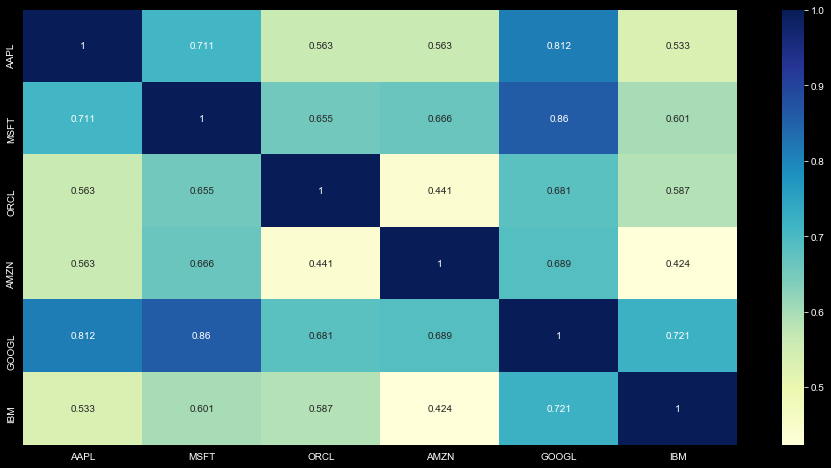

In [23]:
plt.figure(figsize=(16,8))
ax = sns.heatmap(tech_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

5) Finally we will do the risk analysis of these companies and plot a graph of 'Risk vs Returns'

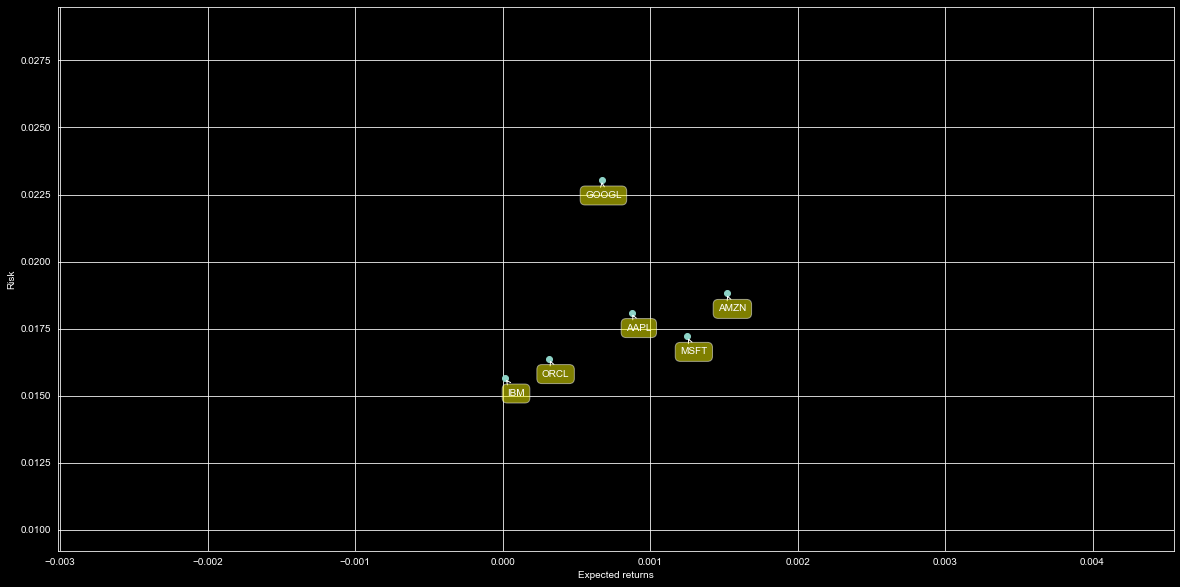

In [24]:
plt.scatter(tech_returns.mean(), tech_returns.std())
plt.xlabel('Expected returns')
plt.ylabel('Risk')
for label, x, y in zip(tech_returns.columns, tech_returns.mean(), tech_returns.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (20, -20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

Low risk, high returns are the best options to invest.
You can do similar analysis for any company you want.
THANKYOU